<a href="https://colab.research.google.com/github/seon0415/weit/blob/main/%ED%83%80%EC%9D%B4%ED%83%80%EB%8B%89_%ED%94%84%EB%A1%9C%EC%A0%9D%ED%8A%B8(%EC%A0%84%EC%B2%98%EB%A6%AC).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plot
import seaborn as sns
from sklearn.model_selection import train_test_split

In [5]:
train=pd.read_csv('train.csv')
train2=train.copy()
test=pd.read_csv('test.csv')
submission=pd.read_csv('submission.csv')

# **1. 변수 검토 or  추출**
- 데이터 검토하기 dtypes, value_counts(), shape, info, describe

# **2. 전처리하기**
- 이상치 결측처리, 결측치확인
- 변수명 바꾸기 rename(columns={:})
- 파생변수 만들기 

# **3. 변수 간 관계 분석**
- 결측치제거, groupby, 평균구하기
- 그래프 만들기 countplot barplot

In [ ]:
test.describe()

In [ ]:
train.describe()

In [ ]:
submission.describe()

- PassengerId : 탑승객의 고유 아이디
- Survival : 생존여부(0: 사망, 1: 생존)
- Pclass : 등실의 등급(1: 1등급, 2: 2등급, 3: 3등급)
- Name : 이름
- Sex : 성별
- Age : 나이
- Sibsp : 함께 탑승한 형제자매, 아내 남편의 수
- Parch: 함께 탑승한 부모, 자식의 수
- Ticket: 티켓번호
- Fare: 티켓의 요금
- Cabin: 객실번호
- Embarked: 배에 탑승한 위치(C = Cherbourg, Q = Queenstown, S = Southampton)


In [ ]:
print('train data shape: ', train.shape)
print('test data shape: ', test.shape)
print('----------[train infomation]----------')
print(train.info())
print('----------[test infomation]----------')
print(test.info())

In [ ]:
train['Sex'].value_counts()

In [ ]:
train['Sex'] = train['Sex'].replace('male',0)
test['Sex'] = test['Sex'].replace('male',0)

train['Sex'] = train['Sex'].replace('female',1)
test['Sex'] = test['Sex'].replace('female',1)

In [ ]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
train.corr()

In [ ]:
# 특정 컬럼과 나머지 컬럼간의 상관계수 계산
train2.corrwith(train2['Embarked'])

  #결과: Fare와 가장 연관성이 뛰어납니다. 따라서 Fare를 살펴보고 Embarked를 채워보겠습니다.

PassengerId    0.013166
Survived      -0.169718
Pclass         0.164681
Sex           -0.110320
Age            0.081471
SibSp          0.068900
Parch          0.040449
Fare          -0.226311
Embarked       1.000000
dtype: float64

In [ ]:
#train['Embarked'] 살펴보기
print(train[train['Embarked'].isnull()])
print(train[train['Fare'] == 80.0])
    #print(train.query('Fare == 80.0'))
print('--'*50)

print('Pclass가 1일때 \n',train[train['Pclass']==1]['Embarked'].value_counts())
print('Survived가 1일때 \n',train[train['Survived']==1]['Embarked'].value_counts())
print('총\n',train['Embarked'].value_counts())

     PassengerId  Survived  Pclass                                       Name  \
61            62         1       1                        Icard, Miss. Amelie   
829          830         1       1  Stone, Mrs. George Nelson (Martha Evelyn)   

     Sex   Age  SibSp  Parch  Ticket  Fare Cabin Embarked  
61     1  38.0      0      0  113572  80.0   B28      NaN  
829    1  62.0      0      0  113572  80.0   B28      NaN  
     PassengerId  Survived  Pclass                                       Name  \
61            62         1       1                        Icard, Miss. Amelie   
829          830         1       1  Stone, Mrs. George Nelson (Martha Evelyn)   

     Sex   Age  SibSp  Parch  Ticket  Fare Cabin Embarked  
61     1  38.0      0      0  113572  80.0   B28      NaN  
829    1  62.0      0      0  113572  80.0   B28      NaN  
----------------------------------------------------------------------------------------------------
Pclass가 1일때 
 S    127
C     85
Q      2
Name: Emba

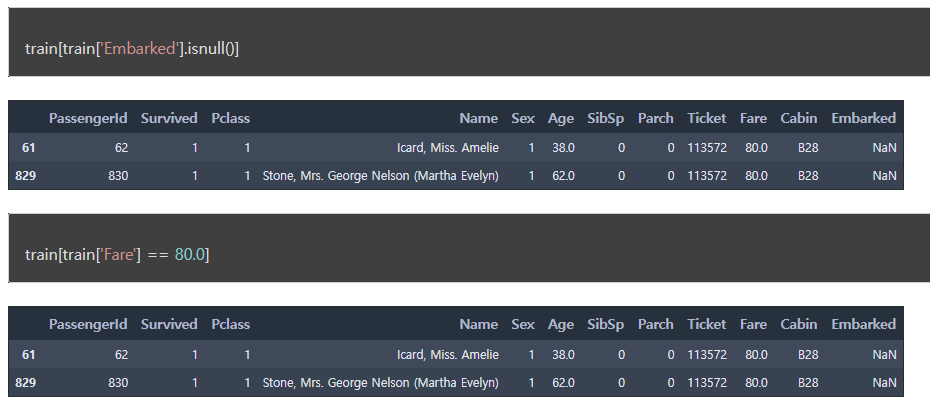

In [ ]:
#train['Embarked'] 결측치를 제일많은 S로 채우기
train['Embarked'] = train['Embarked'].fillna("S")
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [ ]:
#Fare열과 Pcalss열의 상관관계가 높으므로 Pclass가 3인 행들의 Fare열의 분포를 살펴보겠습니다.
Fare = pd.DataFrame(test[test['Pclass']==3]['Fare'].value_counts().nlargest(12))
      #nlargest(): 가장 많은 비중을 차지하고 있는 장르를 추출하겠다는 의미
      #sort_values(ascending=False).head(12)
Fare = Fare.reset_index()
Fare


,index,Fare
0,7.7500,21
1,8.0500,17
2,7.8958,11
3,7.7750,10
4,7.2292,9
5,7.2250,9
6,8.6625,8
7,7.8542,8
8,7.8792,6
9,7.2500,5


In [ ]:
test=pd.read_csv('test.csv')
test.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [ ]:
test[test['Fare'].isnull()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


In [ ]:
#조건에 맞은 Fare 값들이 특출난 값이 없기 때문에 평균값을 채워 넣어줍니다.
test['Fare'] = test['Fare'].fillna("7.753825")
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64

In [ ]:
#Age는 없는 컬럼을 삭제해줍니다.
train2['Age'] = train['Age'].replace(np.nan,0)

#Cabin은 독립 변수로 안 쓸 거라서 별다른 전처리를 하지 않을 것입니다.

#Embarked는 S,C,Q를 범주형으로 변환하려고 합니다
train2 = train.dropna(subset=['Embarked'])
train2['Embarked']=np.where(train2['Embarked']=='C', 0, \
                           np.where(train2['Embarked']=='Q', 1, 2))


train2['Embarked']=train2['Embarked'].astype(int)
train2.info()
train2['Embarked'].value_counts()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int64  
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    int64  
dtypes: float64(2), int64(7), object(3)
memory usage: 90.5+ KB


2    646
0    168
1     77
Name: Embarked, dtype: int64

In [ ]:
train2.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

# **정규화와 표준화**
- 정규화 : -1 ~ 1 사이의 값으로 변환
- 표준화 : 평균이 0이고 표준편차가 1인 값으로 변환

In [ ]:
#정규화
def normalize(x):
  return (x-x.min())/(x.max()-x.min())

In [ ]:
#표준화
def standardscaler(x):
  return (x-x.mean())/x.std()

  #정규화와 표준화 같은 경우 패키지로도 잘 나와있기 때문에 위처럼 정의를 해도 되고, 패키지를 써도 됩니다. 
  #따라서 패키지를 이용하여 바꾸어주겠습니다.

< sklearn StandardScaler method >

- StandardScaler.fit()                 :  평균 𝜇과  표준편차 𝜎를 계산
- StandardScaler.transform()    : 정규화/표준화, Standardization, z = (𝑥-𝜇)/𝜎
- StandardScaler.fit_trasform() : fit() + transform()


In [10]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train[['Fare']])
    # StandardScaler.fit(train[['Fare']]) :   평균과 표준편차

StandardScaler()

In [8]:
train_fare = ss.transform(train[['Fare']])
test_fare = ss.transform(test[['Fare']])
    # StandardScaler.transform(test[['Fare']]) :  정규와 표준화

In [9]:
train['Fare2'] = train_fare
test['Fare2'] = test_fare

In [ ]:
train.head(3)

In [ ]:
#독립변수
data = train[['Pclass','Sex','SibSp','Parch','Embarked','Fare2','Survived']]

- 독립 변수 : 'Pclass', 'Sex',' SibSp', 'Parch', 'Embarked', 'Fare2'
- 종속 변수 : 'Survived

 영향을 받는 변수를 **종속변수**라 하고, 반대로 영향을 주는 변수를 **독립변수** 또는 설명변수라고 한다. 상품의 가격과 수요의 관계에서 상품가격이 수요에 영향을 미치는 것이라 본다면 상품의 가격은 독립변수가 되며, 상품의 수요는 종속변수가 된다.